In [1]:
import sys
sys.path.insert(1, '../../deeplenstronomy')

In [2]:
import deeplenstronomy.deeplenstronomy as dl
from deeplenstronomy.visualize import view_image

/home/jarugula/.conda/envs/bison/lib/python3.11/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


In [3]:
! cat data/demo.yaml

DATASET:
    NAME: MyDeeplenstronomyDataset
    PARAMETERS:
        SIZE: 10
        OUTDIR: MySimulationResults

COSMOLOGY:
    # NAME: 'FlatLambdaCDM'
    PARAMETERS:
        H0: 70
        Om0: 0.3

IMAGE:
    PARAMETERS:
        exposure_time: 90
        numPix: 100
        pixel_scale: 0.263
        psf_type: 'GAUSSIAN'
        read_noise: 7
        ccd_gain: 6.083

SURVEY:
    PARAMETERS:
        BANDS: g,r,i,z,Y
        seeing: 0.9
        magnitude_zero_point: 30.0
        sky_brightness: 23.5
        num_exposures: 10

SPECIES:
    GALAXY_1:
        NAME: LENS
        LIGHT_PROFILE_1:
            NAME: SERSIC_ELLIPSE
            PARAMETERS:
                magnitude: 19.5
                center_x: 0.0
                center_y: 0.0
                R_sersic: 10
                n_sersic: 4
                e1: 0.2
                e2: -0.1
        LIGHT_PROFILE_2:
            NAME: SERSIC_ELLIPSE
            PARAMETERS:
                magnitude: 18.0
                center_x: 0.0


In [4]:
dataset_demo = dl.make_dataset('data/demo.yaml',verbose=True)

Entering main organization loop
Organizing CONFIGURATION_1
Organizing CONFIGURATION_2
Organizing CONFIGURATION_3
Organizing CONFIGURATION_4
Generating images for CONFIGURATION_1
	Progress: 100.0 %  ---  Elapsed Time: 0 H 0 M 0 S         
Generating images for CONFIGURATION_2
	Progress: 100.0 %  ---  Elapsed Time: 0 H 0 M 0 S         
Generating images for CONFIGURATION_3
	Progress: 100.0 %  ---  Elapsed Time: 0 H 0 M 0 S         
Generating images for CONFIGURATION_4
	Progress: 100.0 %  ---  Elapsed Time: 0 H 0 M 0 S         


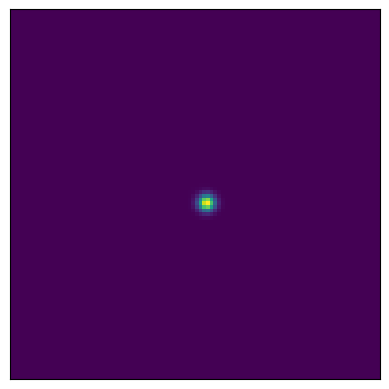

In [5]:
view_image(dataset_demo.CONFIGURATION_1_images[0][0])

## Defining Cosmology in the yaml file

The available cosmologies in Deeplenstronomy are 'FlatLambdaCDM', 'LambdaCDM', 'FlatwCDM', and 'wCDM'.

These options can be given through 'NAME' under 'COSMOLOGY' in the yaml file. If 'NAME' is not specified, the default option is 'FlatLambdaCDM'

The input parameters to be given for each cosmology is detailed in astropy cosmology classes https://docs.astropy.org/en/stable/cosmology/index.html#module-astropy.cosmology

For example:

- The yaml file should have H0, Om0 for 'FlatLambdaCDM' either as constants or as distributions and the other parameters are optional
- The yaml file should have H0, Om0, Ode0 for 'wCDM'


H0 and Om0 have to be specified for 'FlatLambdaCDM'. The other parameters that this cosmology takes are :

cosmology_info = [H0, Om0, Tcmb0, Neff, m_nu, Ob0]

For 'wCDM', cosmology_info = ['H0', 'Om0', 'Ode0', 'w0', 'Tcmb0', 'Neff', 'm_nu', 'Ob0']

These parameters can either be fixed as shown in the above example or they can be drawn from a distribution as shown in the example below.

Note that, for 'wCDM', if either of Ode0 or Om0 is to be drawn from a distribution, always set Om0 to be drawn from the dsitribution and set Ode0 to any value. This will be overwritten to make sure Ode0 + Om0 = 1

In [6]:
! cat data/demo_cosmology.yaml

DATASET:
    NAME: MyDeeplenstronomyDataset
    PARAMETERS:
        SIZE: 10
        OUTDIR: MySimulationResults

COSMOLOGY:
    NAME: 'wCDM'
    # NAME: 'FlatLambdaCDM'
    PARAMETERS:
        H0: 
          DISTRIBUTION:
                  NAME: uniform
                  PARAMETERS:
                      minimum: 69.0
                      maximum: 72.0
        w0: 
          DISTRIBUTION:
                  NAME: uniform
                  PARAMETERS:
                      minimum: -1.0
                      maximum: -0.8
        Ode0: 0.7
        Om0: 
            DISTRIBUTION:
                      NAME: uniform
                      PARAMETERS:
                          minimum: 0.0
                          maximum: 0.5

IMAGE:
    PARAMETERS:
        exposure_time: 90
        numPix: 100
        pixel_scale: 0.263
        psf_type: 'GAUSSIAN'
        read_noise: 7
        ccd_gain: 6.083

SURVEY:
    PARAMETERS:
        BANDS: g
        seeing: 0.9
        magnitude_zero_point: 30

In this config file, all the parameters except the comsology is drawn from a distribution for simplicity. 

The available cosmologies in Deeplenstronomy are 'FlatLambdaCDM', 'LambdaCDM', 'FlatwCDM', and 'wCDM'. 

These options can be given through 'NAME' under 'COSMOLOGY' in the yaml file. If 'NAME' is not specified, the default option is 'FlatLambdaCDM'

The input parameters to be given for each cosmology is detailed in astropy cosmology classes https://docs.astropy.org/en/stable/cosmology/index.html#module-astropy.cosmology

For example:

- The yaml file should have H0, Om0 for 'FlatLambdaCDM' either as constants or as distributions and the other parametrs are optional
- The yaml file should have H0, Om0, Ode0 for 'wCDM'



In [10]:
dataset = dl.make_dataset('data/demo_cosmology.yaml',verbose=True)

Entering main organization loop
Organizing CONFIGURATION_1
cosmology:  wCDM
cosmology:  wCDM
cosmology:  wCDM
cosmology:  wCDM
cosmology:  wCDM
cosmology:  wCDM
cosmology:  wCDM
cosmology:  wCDM
cosmology:  wCDM
cosmology:  wCDM
Generating images for CONFIGURATION_1
wCDM(H0=70.14306206998731 km / (Mpc s), Om0=0.0830183621570676, Ode0=0.9169816378429324, w0=-0.953856162737905, Tcmb0=0.0 K, Neff=3.04, m_nu=None, Ob0=None)
wCDM(H0=71.74150030431814 km / (Mpc s), Om0=0.3450663286576336, Ode0=0.6549336713423664, w0=-0.8844121949428136, Tcmb0=0.0 K, Neff=3.04, m_nu=None, Ob0=None)
wCDM(H0=70.65917842708795 km / (Mpc s), Om0=0.3658121033134064, Ode0=0.6341878966865936, w0=-0.9232911872089454, Tcmb0=0.0 K, Neff=3.04, m_nu=None, Ob0=None)
wCDM(H0=70.72928387692559 km / (Mpc s), Om0=0.3307904861787108, Ode0=0.6692095138212892, w0=-0.8437580864890355, Tcmb0=0.0 K, Neff=3.04, m_nu=None, Ob0=None)
wCDM(H0=71.51789405237884 km / (Mpc s), Om0=0.0775247103969201, Ode0=0.9224752896030799, w0=-0.9121210

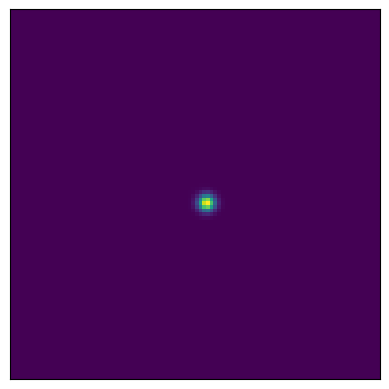

In [11]:
view_image(dataset.CONFIGURATION_1_images[0][0])